## Pre Processing

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import keras
import math
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import sys

In [2]:
orig=pd.read_csv('dataset.csv')

In [3]:
orig = orig.replace(' ',np.nan)

In [4]:
orig.head()

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights,specifications,image_links
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...,NaN,https://rukminim1.flixcart.com/image/612/612/x...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...,NaN,https://rukminim1.flixcart.com/image/612/612/x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g,NaN,https://rukminim1.flixcart.com/image/612/612/x...
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g,NaN,https://rukminim1.flixcart.com/image/612/612/k...
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...,NaN,https://rukminim1.flixcart.com/image/612/612/j...


In [5]:
orig.isna().sum()

category_1            0
category_2            0
category_3            0
title                18
product_rating       80
selling_price        28
mrp                 375
seller_name         216
seller_rating       214
description        7020
highlights         5481
specifications    12041
image_links           0
dtype: int64

In [6]:
orig = orig.drop(['highlights','specifications','mrp','image_links'],axis=1)

In [7]:
dataset = orig.dropna().reset_index(drop = True)

In [8]:
for i in dataset.selling_price.index:
    k = ''
    for j in dataset.selling_price[i]:
        if j==',' or j == '₹':
            continue
        k=k+j
    dataset.selling_price[i]=int(k)
        

C:\Users\prasa\AppData\Local\Temp\ipykernel_4692\4294518981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.selling_price[i]=int(k)


In [9]:
dataset.selling_price = dataset.selling_price.astype(int)

In [10]:
dataset.product_rating = dataset.product_rating.astype(float)
dataset.seller_rating = dataset.seller_rating.astype(float)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4941 entries, 0 to 4940
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_1      4941 non-null   object 
 1   category_2      4941 non-null   object 
 2   category_3      4941 non-null   object 
 3   title           4941 non-null   object 
 4   product_rating  4941 non-null   float64
 5   selling_price   4941 non-null   int32  
 6   seller_name     4941 non-null   object 
 7   seller_rating   4941 non-null   float64
 8   description     4941 non-null   object 
dtypes: float64(2), int32(1), object(6)
memory usage: 328.2+ KB


In [12]:
le = LabelEncoder()

In [14]:
dataset = dataset.drop(['seller_name'],axis = 1)

In [15]:
all_word = np.hstack([dataset.title.str.lower(),dataset.description.str.lower()])

In [16]:
tokenizer = Tokenizer()

In [17]:
tokenizer.fit_on_texts(all_word)

In [18]:
dataset.title = tokenizer.texts_to_sequences(dataset.title.str.lower())
dataset.description = tokenizer.texts_to_sequences(dataset.description.str.lower())

<Axes: >

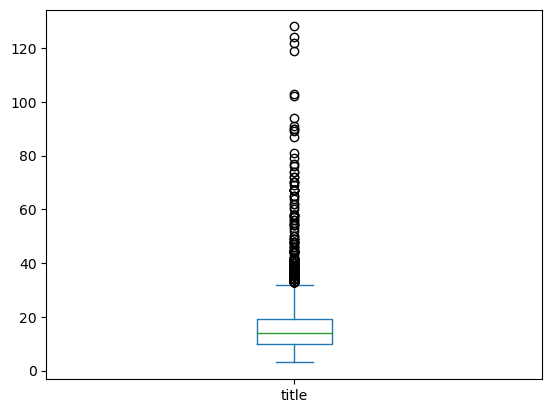

In [19]:
dataset.title.apply(lambda x:len(x)).plot(kind = 'box')

<Axes: >

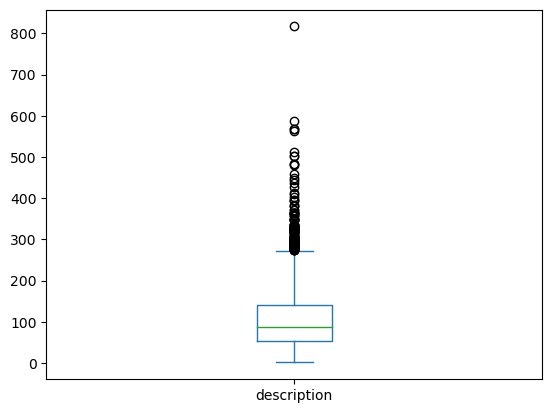

In [20]:
dataset.description.apply(lambda x:len(x)).plot(kind = 'box')

In [21]:
max_title = 32
max_description = 64

In [22]:
dataset.head()

,category_1,category_2,category_3,title,product_rating,selling_price,seller_rating,description
0,4,48,47,"[15085, 1335, 1319, 4225, 11612, 1319, 9855, 6...",4.4,152,4.4,"[111, 77, 111, 343, 1335, 1319, 5068, 1032]"
1,4,48,47,"[7667, 11613, 234, 71, 251, 782, 5234, 1335, 1...",3.4,329,4.7,"[2, 7667, 5234, 4951, 1335, 1320, 35, 291, 60,..."
2,4,48,47,"[3359, 77, 1335, 1320, 334, 310, 11614, 221, 6...",4.1,369,4.1,"[3359, 77, 1335, 1197, 11614, 1320, 152, 74, 5..."
3,4,48,47,"[4446, 234, 71, 408, 365, 119, 1335, 1320, 4, ...",4.0,249,4.8,"[4446, 365, 119, 234, 71, 1335, 1320, 167, 4, ..."
4,4,48,47,"[4446, 3605, 1335, 1320, 71, 32, 4, 421, 1300,...",3.9,249,4.8,"[4446, 3605, 1335, 1320, 71, 32, 4, 421, 1300,..."


In [34]:
dataset.to_csv('preprocessed_dataset.csv', index=False)

In [36]:
dataset = pd.read_csv('preprocessed_dataset.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_1      12041 non-null  int64  
 1   category_2      12041 non-null  int64  
 2   category_3      12041 non-null  int64  
 3   title           12023 non-null  object 
 4   product_rating  11961 non-null  float64
 5   selling_price   12013 non-null  object 
 6   mrp             11666 non-null  object 
 7   seller_rating   11827 non-null  float64
 8   description     5021 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 846.8+ KB


In [41]:
import pandas as pd

df = pd.read_csv('preprocessed_dataset.csv')

def convert_price(price):
    if isinstance(price, str):
        return int(price.replace('₹', '').replace(',', ''))
    else:
        return 0  

df['selling_price'] = df['selling_price'].fillna(0).apply(convert_price)
df['mrp'] = df['mrp'].fillna(0).apply(convert_price)

df.to_csv('preprocessed_dataset2.csv', index=False)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_1      12041 non-null  int64  
 1   category_2      12041 non-null  int64  
 2   category_3      12041 non-null  int64  
 3   title           12023 non-null  object 
 4   product_rating  11961 non-null  float64
 5   selling_price   12041 non-null  int64  
 6   mrp             12041 non-null  int64  
 7   seller_rating   11827 non-null  float64
 8   description     5021 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 846.8+ KB


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib
data = pd.read_csv('preprocessed_dataset2.csv')
data.fillna(0, inplace=True)
X = data[['category_1', 'category_2', 'category_3', 'product_rating', 'mrp', 'seller_rating']]
y = data['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
joblib.dump(model, 'cat123_prr_mrp_seller_rat.pkl')
print("Model saved successfully!")

Mean Absolute Error (MAE): 597.2123079705792
Mean Squared Error (MSE): 21420489.900150653
Root Mean Squared Error (RMSE): 4628.227511710142
R² Score: 0.7814337540203329
Model saved successfully!


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Load the saved model and vectorizer
model = joblib.load('cat123_prr_mrp_seller_rat.pkl')

# Define input data
input_data = [
    {
        'category_1': -4,
        'category_2': -28,
        'category_3': -117,
        'product_rating': 4.6,
        'mrp':35324,
        'seller_rating': 4.3
    },
    #row 1707 actual 31500
    {
        'category_1': -4,
        'category_2': -64,
        'category_3': -68,
        'product_rating': 3.8,
        'mrp':299,
        'seller_rating': 4.7
        #row5 actual 75
    },
    {
        'category_1': -1,
        'category_2': -63,
        'category_3': -33,
        'product_rating': 4.2,
        'mrp':2999,
        'seller_rating': 4.5
    },#row2595 actual 1499
    {
        'category_1': -3,
        'category_2': -57,
        'category_3': -226,
        'product_rating': 4,
        'mrp':2395,
        'seller_rating': 4.2
    },#row5113 actual 1845
    {
        'category_1': -5,
        'category_2': -19,
        'category_3': -163,
        'product_rating': 3.7,
        'mrp':999,
        'seller_rating': 4.4
    },#row6196 actual 310
    {
        'category_1': -0,
        'category_2': -3,
        'category_3': -8,
        'product_rating': 4.1,
        'mrp':5999,
        'seller_rating': 4.1
    },#row9723 actual 5414 3838 because similar categories are all less in dataset
    {
        'category_1': -3,
        'category_2': -52,
        'category_3': -222,
        'product_rating': 4.1,
        'mrp':245,
        'seller_rating': 4.9
    }#row 3327
]

predicted_prices = []

# Iterate over input data and make predictions
for data in input_data:
    input_df = pd.DataFrame(data, index=[0])
    predicted_price = model.predict(input_df)
    predicted_prices.append(predicted_price[0])

# Print predicted prices
for i, price in enumerate(predicted_prices):
    print(f"Predicted Price for input {i+1}:", price)


Predicted Price for input 1: 25404.9
Predicted Price for input 2: 203.69
Predicted Price for input 3: 1099.533492063492
Predicted Price for input 4: 1079.7378571428571
Predicted Price for input 5: 421.605
Predicted Price for input 6: 4334.04
Predicted Price for input 7: 160.87


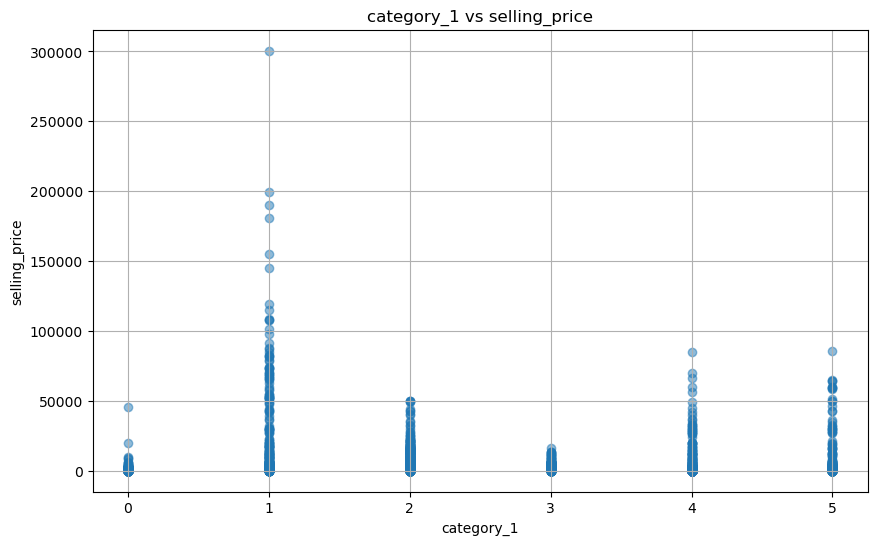

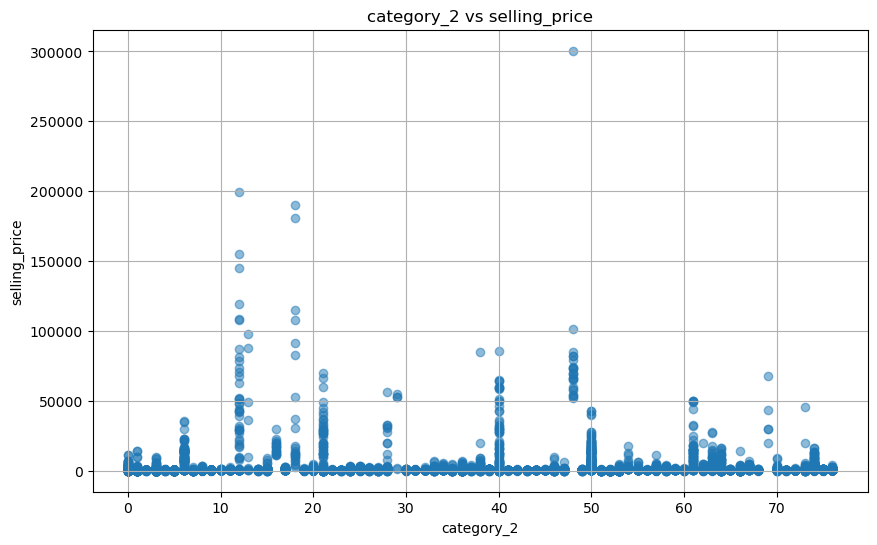

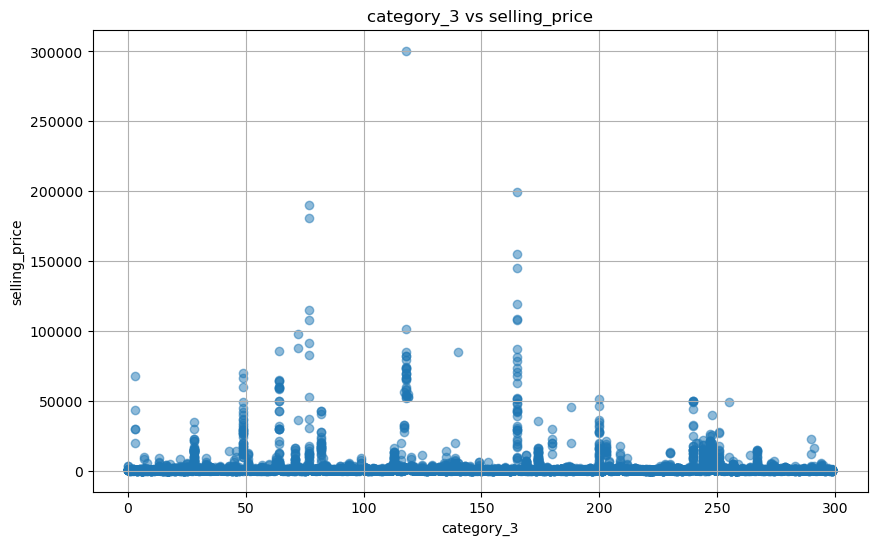

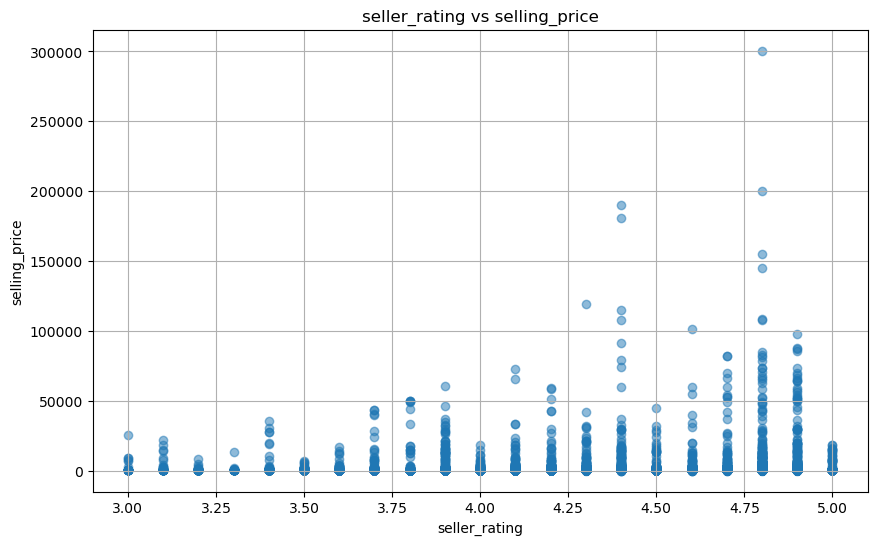

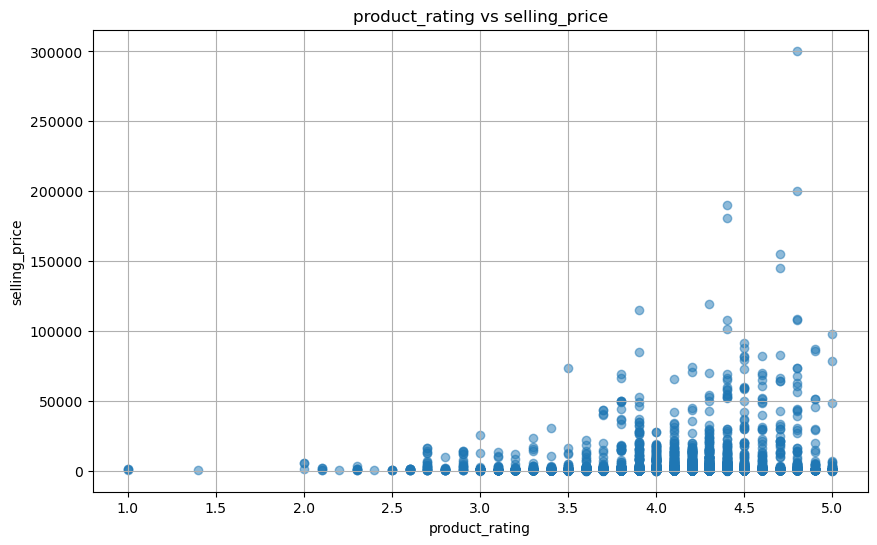

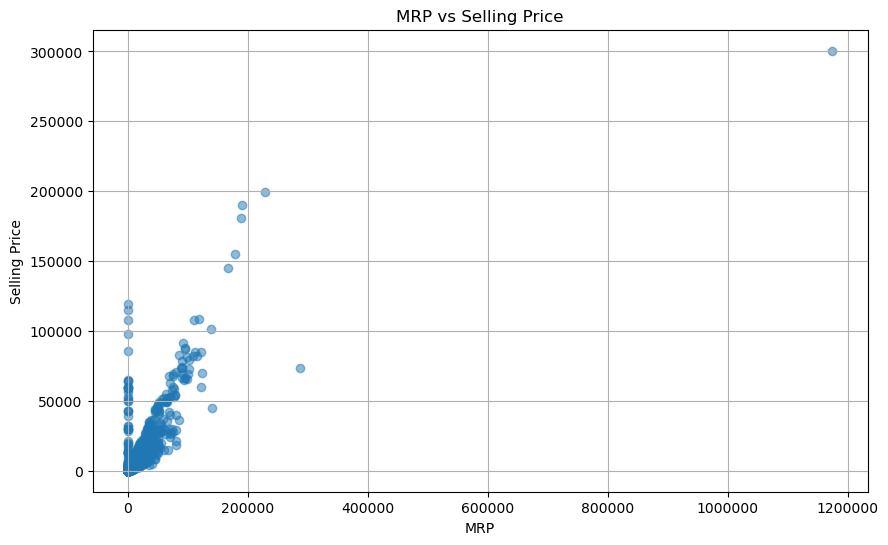

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the dataset
data = pd.read_csv('preprocessed_dataset2.csv')

# Scatter plot for seller_rating vs selling_price

# Scatter plot for seller_rating vs selling_price
plt.figure(figsize=(10, 6))
plt.scatter(data['category_1'], data['selling_price'], alpha=0.5)
plt.title('category_1 vs selling_price')
plt.xlabel('category_1')
plt.ylabel('selling_price')
plt.grid(True)
plt.show()
# Scatter plot for seller_rating vs selling_price
plt.figure(figsize=(10, 6))
plt.scatter(data['category_2'], data['selling_price'], alpha=0.5)
plt.title('category_2 vs selling_price')
plt.xlabel('category_2')
plt.ylabel('selling_price')
plt.grid(True)
plt.show()
# Scatter plot for seller_rating vs selling_price
plt.figure(figsize=(10, 6))
plt.scatter(data['category_3'], data['selling_price'], alpha=0.5)
plt.title('category_3 vs selling_price')
plt.xlabel('category_3')
plt.ylabel('selling_price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['seller_rating'], data['selling_price'], alpha=0.5)
plt.title('seller_rating vs selling_price')
plt.xlabel('seller_rating')
plt.ylabel('selling_price')
plt.grid(True)
plt.show()

# Scatter plot for product_specification_features vs selling_price
plt.figure(figsize=(10, 6))
plt.scatter(data['product_rating'], data['selling_price'], alpha=0.5)
plt.title('product_rating vs selling_price')
plt.xlabel('product_rating')
plt.ylabel('selling_price')
plt.grid(True)
plt.show()

# Scatter plot for seller_rating vs selling_price
plt.figure(figsize=(10, 6))
plt.scatter(data['mrp'], data['selling_price'], alpha=0.5)
plt.title('MRP vs Selling Price')
plt.xlabel('MRP')
plt.ylabel('Selling Price')

# Define formatter function to format ticks without scientific notation
formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()


In [19]:
import pandas as pd

# Load the dataset
data = pd.read_csv('preprocessed_dataset2.csv')

# Select the features to calculate correlation with
features = ['category_1', 'category_2', 'category_3', 'product_rating', 'seller_rating', 'mrp']

# Calculate the correlation coefficients
correlation = data[features + ['selling_price']].corr()['selling_price'].sort_values(ascending=False)

# Display correlation coefficients
print(correlation)


selling_price     1.000000
mrp               0.782882
product_rating    0.115018
seller_rating     0.044142
category_2        0.003731
category_3       -0.027461
category_1       -0.038145
Name: selling_price, dtype: float64


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import joblib

# Step 1: Load and preprocess the dataset
data = pd.read_csv('preprocessed_dataset2.csv')
data.fillna(0, inplace=True)
data['text_data'] = data['title'].astype(str)

# Step 2: Feature Selection
X_text = data['text_data']
X_input = data[['category_1', 'category_2', 'category_3','mrp']]

# Target variable
y = data['selling_price']

# Step 3: Split the dataset into training and testing sets
X_text_train, X_text_test, X_input_train, X_input_test, y_train, y_test = \
    train_test_split(X_text, X_input, y, test_size=0.2, random_state=42)

# Step 4: Feature Extraction for Text Data
vectorizer = TfidfVectorizer(max_features=997)
X_text_train_transformed = vectorizer.fit_transform(X_text_train)
X_text_test_transformed = vectorizer.transform(X_text_test)

# Combine text features with 'product_rating' and 'category' features for training and testing sets
X_train = np.hstack((X_text_train_transformed.toarray(), X_input_train))
X_test = np.hstack((X_text_test_transformed.toarray(), X_input_test))

# Step 5: Model Selection and Training (XGBoost)
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

# Step 7: Save the Model and Vectorizer
joblib.dump(model, 'xgboost_model.pkl')
print("Model saved successfully!")
joblib.dump(vectorizer, 'tfidf_vectorizer_product_rating_xgb.pkl')
print("Vectorizer saved successfully!")


Mean Absolute Error (MAE): 683.5424190614668
Mean Squared Error (MSE): 29321654.510293838
Root Mean Squared Error (RMSE): 5414.947322947273
R² Score: 0.7008133809216649
Model saved successfully!
Vectorizer saved successfully!


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import joblib

# Load the saved model and vectorizer
model = joblib.load('xgboost_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer_product_rating_xgb.pkl')

# Define input data
input_data = [
    {
        'title': 'Xbox Series S Console 512 GB',
        'category_1': -4,
        'category_2': -28,
        'category_3': -117,
        'mrp':35324
    },#row1707 actual 31500
    {
        'title': 'VICTORY Cricket Wind Ball',
        'category_1': -4,
        'category_2': -64,
        'category_3': -68,
        'mrp':299
        #row5 actual 75
    },
    {
        'title': 'Mivi Fort S16 Soundbar',
        'category_1': -1,
        'category_2': -63,
        'category_3': -33,
        'mrp':2999
    },#row2595 actual 1499
    {
        'title': 'HAVELLS RS7005  Shaver For MenÂ Â (Black, Red)',
        'category_1': -3,
        'category_2': -57,
        'category_3': -226,
        'mrp':2395
    },#row5113 actual 1845
    {
        'title': 'lifeneeds Churidar  Ethnic Wear LeggingÂ Â (Multicolor, Solid)',
        'category_1': -5,
        'category_2': -19,
        'category_3': -163,
        'mrp':999
    },#row6196 actual 310
    {
        'title': 'Safe-O-Kid Polyester Baby Bed Sized Bedding SetÂ Â (Black)',
        'category_1': -0,
        'category_2': -3,
        'category_3': -8,
        'mrp':5999
    }#row9723 actual 5414 3838 because similar categories are all less in dataset
]
# Create an empty list to store predicted prices
predicted_prices = []

# Iterate over input data and make predictions
for data in input_data:
    # Preprocess the text data
    text_data = data['title']
    X_text_input_transformed = vectorizer.transform([text_data])
    
    # Combine text features with category features
    X_input = np.hstack((X_text_input_transformed.toarray(), 
                         np.array([[data['category_1'], data['category_2'], data['category_3'], data['mrp']]] * X_text_input_transformed.shape[0])))
    
    # Make predictions
    predicted_price = model.predict(X_input)
    predicted_prices.append(predicted_price[0])

# Print predicted prices
for i, price in enumerate(predicted_prices):
    print(f"Predicted Price for input {i+1}:", price)




Predicted Price for input 1: 24228.252
Predicted Price for input 2: 169.92384
Predicted Price for input 3: 1029.6145
Predicted Price for input 4: 717.1617
Predicted Price for input 5: 291.7286
Predicted Price for input 6: 2808.9617
Predicted Price for input 7: 1982.1079


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Load the saved model and vectorizer
model = joblib.load('title_cat123.pkl')

# Define input data
input_data = [
    {
        'title': 'Xbox Series S Console 512 GB',
        'category_1': -4,
        'category_2': -28,
        'category_3': -117
    },
    {
        'title': 'VICTORY Cricket Wind Ball',
        'category_1': -4,
        'category_2': -64,
        'category_3': -68
        #row5 actual 75
    },
    {
        'title': 'Mivi Fort S16 Soundbar',
        'category_1': -1,
        'category_2': -63,
        'category_3': -33
    },#row2595 actual 1499
    {
        'title': 'HAVELLS RS7005  Shaver For MenÂ Â (Black, Red)',
        'category_1': -3,
        'category_2': -57,
        'category_3': -226
    },#row5113 actual 1845
    {
        'title': 'lifeneeds Churidar  Ethnic Wear LeggingÂ Â (Multicolor, Solid)',
        'category_1': -5,
        'category_2': -19,
        'category_3': -163
    },#row6196 actual 310
    {
        'title': 'Safe-O-Kid Polyester Baby Bed Sized Bedding SetÂ Â (Black)',
        'category_1': -0,
        'category_2': -3,
        'category_3': -8
    }#row9723 actual 5414 3838 because similar categories are all less in dataset
]

# Create an empty list to store predicted prices
predicted_prices = []

# Iterate over input data and make predictions
for data in input_data:
    input_df = pd.DataFrame(data, index=[0])
    input_df['text_data'] = input_df['title']
    X_text_input_transformed = vectorizer.transform(input_df['text_data'])
    predicted_price = model.predict(X_text_input_transformed)
    predicted_prices.append(predicted_price[0])

# Print predicted prices
for i, price in enumerate(predicted_prices):
    print(f"Predicted Price for input {i+1}:", price)


NameError: name 'vectorizer' is not defined

In [9]:
'''import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA

data = pd.read_csv('preprocessed_dataset2.csv')


data.fillna(0, inplace=True)



X = data[['category_1', 'category_2', 'category_3', 'product_rating', 'mrp', 'seller_rating']]
y = data['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),  
    ('model', RandomForestRegressor(random_state=42))  
])
param_grid_rf = {
    'pca__n_components': [2, 4],
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=cv, scoring='r2', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

best_model_rf = grid_search_rf.best_estimator_

y_pred_rf = best_model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print(f'Mean Absolute Error (MAE): {mae_rf}')
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'R² Score: {r2_rf}')
'''

Random Forest:
Mean Absolute Error (MAE): 715.6908313332075
Mean Squared Error (MSE): 15205430.892911457
Root Mean Squared Error (RMSE): 3899.4141730407987
R² Score: 0.8448497693442791
